In [ ]:
#%pip install pandas
#%pip install pyarrow

In [1]:
import pandas as pd

In [2]:
df_test = pd.read_parquet('../Datos/df_test.parquet')

In [3]:
df_train = pd.read_parquet('../Datos/df_train.parquet')

In [ ]:
df_test

In [4]:
df_train

,id,id_bar,anio,semana,ESTRATO,area_barrio,dengue,concentraciones,vivienda,equipesado,sumideros,maquina,lluvia_mean,lluvia_var,lluvia_max,lluvia_min,temperatura_mean,temperatura_var,temperatura_max,temperatura_min
0,4_2015_01,4,2015,1,3.0,0.560,0.0,0.0,0.0,0.0,0.0,0.0,0.000651,0.000041,0.062500,0.0,26.163889,11.588928,31.800000,20.900000
1,5_2015_01,5,2015,1,3.0,0.842,0.0,0.0,0.0,0.0,0.0,0.0,0.000651,0.000041,0.062500,0.0,26.163889,11.588928,31.800000,20.900000
2,3_2015_01,3,2015,1,1.0,0.781,0.0,0.0,0.0,0.0,0.0,0.0,0.000651,0.000041,0.062500,0.0,26.163889,11.588928,31.800000,20.900000
3,8_2015_01,8,2015,1,2.0,0.394,0.0,0.0,0.0,0.0,0.0,0.0,0.000651,0.000041,0.062500,0.0,26.163889,11.588928,31.800000,20.900000
4,9_2015_01,9,2015,1,2.0,0.292,0.0,0.0,0.0,0.0,0.0,0.0,0.000651,0.000041,0.062500,0.0,26.163889,11.588928,31.800000,20.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,2_2021_53,2,2021,53,2.0,0.780,0.0,0.0,0.0,0.0,0.0,0.0,0.277575,2.310524,10.090138,0.0,25.824778,11.174080,32.994039,20.705364
3676,6_2021_53,6,2021,53,1.0,0.381,1.0,0.0,0.0,0.0,0.0,0.0,0.277575,2.310524,10.090138,0.0,25.824778,11.174080,32.994039,20.705364
3677,1_2021_53,1,2021,53,1.0,0.600,1.0,0.0,0.0,0.0,0.0,0.0,0.277575,2.310524,10.090138,0.0,25.824778,11.174080,32.994039,20.705364
3678,7_2021_53,7,2021,53,3.0,0.917,1.0,0.0,0.0,0.0,0.0,0.0,0.277575,2.310524,10.090138,0.0,25.824778,11.174080,32.994039,20.705364


In [ ]:
# Check null values in both dataframes
print("Null values in df_train:")
print(df_train.isnull().sum())

In [ ]:
print("\nNull values in df_test:")
print(df_test.isnull().sum())

In [ ]:
df_train.info()

In [ ]:
df_test.info()

In [ ]:
df_train.describe()

In [ ]:
%pip install matplotlib
%pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

class EDAAutomatico:
    def __init__(self, ruta_carpeta):
        """
        Inicializa el análisis exploratorio automático
        
        Args:
            ruta_carpeta (str): Ruta a la carpeta que contiene los archivos de datos
        """
        self.ruta_carpeta = ruta_carpeta
        self.dataframes = {}
        self.archivos_encontrados = []
        
    def cargar_datos(self):
        """Carga automáticamente todos los archivos de datos de la carpeta"""
        
        # Extensiones de archivo soportadas
        extensiones = ['*.csv', '*.xlsx', '*.xls', '*.json', '*.parquet']
        
        print(f"🔍 Buscando archivos en: {self.ruta_carpeta}")
        print("="*60)
        
        for extension in extensiones:
            archivos = glob.glob(os.path.join(self.ruta_carpeta, extension))
            
            for archivo in archivos:
                nombre_archivo = Path(archivo).stem
                print(f"📂 Cargando: {archivo}")
                
                try:
                    if archivo.endswith('.csv'):
                        df = pd.read_csv(archivo)
                    elif archivo.endswith(('.xlsx', '.xls')):
                        df = pd.read_excel(archivo)
                    elif archivo.endswith('.json'):
                        df = pd.read_json(archivo)
                    elif archivo.endswith('.parquet'):
                        df = pd.read_parquet(archivo)
                    
                    self.dataframes[nombre_archivo] = df
                    self.archivos_encontrados.append(nombre_archivo)
                    print(f"✅ Éxito: {df.shape[0]} filas, {df.shape[1]} columnas")
                    
                except Exception as e:
                    print(f"❌ Error cargando {archivo}: {str(e)}")
        
        print(f"\n📊 Total de archivos cargados: {len(self.dataframes)}")
        return self.dataframes
    
    def resumen_general(self, nombre_df=None):
        """Genera resumen general de los datos"""
        
        if nombre_df:
            dfs_a_analizar = {nombre_df: self.dataframes[nombre_df]}
        else:
            dfs_a_analizar = self.dataframes
            
        for nombre, df in dfs_a_analizar.items():
            print(f"\n{'='*20} RESUMEN: {nombre.upper()} {'='*20}")
            
            # Información básica
            print(f"📏 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
            print(f"💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
            
            # Tipos de datos
            print(f"\n📋 Tipos de datos:")
            tipos = df.dtypes.value_counts()
            for tipo, cantidad in tipos.items():
                print(f"   {tipo}: {cantidad} columnas")
            
            # Valores faltantes
            valores_faltantes = df.isnull().sum()
            if valores_faltantes.sum() > 0:
                print(f"\n⚠️  Valores faltantes:")
                faltantes_pct = (valores_faltantes / len(df)) * 100
                for col in valores_faltantes[valores_faltantes > 0].index:
                    print(f"   {col}: {valores_faltantes[col]} ({faltantes_pct[col]:.1f}%)")
            else:
                print(f"\n✅ Sin valores faltantes")
            
            # Duplicados
            duplicados = df.duplicated().sum()
            print(f"\n🔄 Filas duplicadas: {duplicados} ({(duplicados/len(df)*100):.1f}%)")
            
            print(f"\n📊 Primeras 5 filas:")
            print(df.head())
    
    def analisis_estadistico(self, nombre_df=None):
        """Realiza análisis estadístico descriptivo"""
        
        if nombre_df:
            dfs_a_analizar = {nombre_df: self.dataframes[nombre_df]}
        else:
            dfs_a_analizar = self.dataframes
            
        for nombre, df in dfs_a_analizar.items():
            print(f"\n{'='*15} ESTADÍSTICAS: {nombre.upper()} {'='*15}")
            
            # Variables numéricas
            numericas = df.select_dtypes(include=[np.number])
            if not numericas.empty:
                print(f"\n📈 Variables numéricas ({len(numericas.columns)}):")
                print(numericas.describe())
                
                # Detectar outliers (método IQR)
                print(f"\n🎯 Detección de outliers (método IQR):")
                for col in numericas.columns:
                    Q1 = numericas[col].quantile(0.25)
                    Q3 = numericas[col].quantile(0.75)
                    IQR = Q3 - Q1
                    outliers = ((numericas[col] < (Q1 - 1.5 * IQR)) | 
                              (numericas[col] > (Q3 + 1.5 * IQR))).sum()
                    if outliers > 0:
                        print(f"   {col}: {outliers} outliers ({(outliers/len(df)*100):.1f}%)")
            
            # Variables categóricas
            categoricas = df.select_dtypes(include=['object', 'category'])
            if not categoricas.empty:
                print(f"\n📊 Variables categóricas ({len(categoricas.columns)}):")
                for col in categoricas.columns:
                    valores_unicos = df[col].nunique()
                    print(f"   {col}: {valores_unicos} valores únicos")
                    if valores_unicos <= 10:
                        print(f"      Valores: {df[col].value_counts().head().to_dict()}")
    
    def visualizaciones(self, nombre_df=None, max_cols=6):
        """Genera visualizaciones automáticas"""
        
        if nombre_df:
            dfs_a_analizar = {nombre_df: self.dataframes[nombre_df]}
        else:
            dfs_a_analizar = self.dataframes
            
        for nombre, df in dfs_a_analizar.items():
            print(f"\n{'='*15} VISUALIZACIONES: {nombre.upper()} {'='*15}")
            
            # Variables numéricas
            numericas = df.select_dtypes(include=[np.number]).columns[:max_cols]
            
            if len(numericas) > 0:
                # Histogramas
                n_cols = min(3, len(numericas))
                n_rows = (len(numericas) + n_cols - 1) // n_cols
                
                fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
                if n_rows == 1:
                    axes = [axes] if n_cols == 1 else axes
                else:
                    axes = axes.flatten()
                
                for i, col in enumerate(numericas):
                    df[col].hist(bins=30, ax=axes[i], alpha=0.7)
                    axes[i].set_title(f'Distribución de {col}')
                    axes[i].set_xlabel(col)
                    axes[i].set_ylabel('Frecuencia')
                
                # Ocultar subplots vacíos
                for i in range(len(numericas), len(axes)):
                    axes[i].set_visible(False)
                
                plt.tight_layout()
                plt.show()
                
                # Boxplots para detectar outliers
                if len(numericas) > 1:
                    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
                    if n_rows == 1:
                        axes = [axes] if n_cols == 1 else axes
                    else:
                        axes = axes.flatten()
                    
                    for i, col in enumerate(numericas):
                        df.boxplot(column=col, ax=axes[i])
                        axes[i].set_title(f'Boxplot de {col}')
                    
                    for i in range(len(numericas), len(axes)):
                        axes[i].set_visible(False)
                    
                    plt.tight_layout()
                    plt.show()
            
            # Matriz de correlación
            if len(numericas) > 1:
                plt.figure(figsize=(10, 8))
                corr_matrix = df[numericas].corr()
                mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
                sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
                           center=0, square=True, linewidths=0.5)
                plt.title(f'Matriz de Correlación - {nombre}')
                plt.tight_layout()
                plt.show()
            
            # Variables categóricas (top 5)
            categoricas = df.select_dtypes(include=['object', 'category']).columns[:5]
            
            if len(categoricas) > 0:
                n_cols = min(2, len(categoricas))
                n_rows = (len(categoricas) + n_cols - 1) // n_cols
                
                fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
                if n_rows == 1:
                    axes = [axes] if n_cols == 1 else axes
                else:
                    axes = axes.flatten()
                
                for i, col in enumerate(categoricas):
                    top_values = df[col].value_counts().head(10)
                    top_values.plot(kind='bar', ax=axes[i])
                    axes[i].set_title(f'Frecuencia de {col}')
                    axes[i].set_xlabel(col)
                    axes[i].set_ylabel('Frecuencia')
                    axes[i].tick_params(axis='x', rotation=45)
                
                for i in range(len(categoricas), len(axes)):
                    axes[i].set_visible(False)
                
                plt.tight_layout()
                plt.show()
    
    def generar_reporte_completo(self, nombre_df=None):
        """Genera un reporte completo de EDA"""
        print("🚀 INICIANDO ANÁLISIS EXPLORATORIO DE DATOS")
        print("="*60)
        
        if not self.dataframes:
            print("⚠️  No hay datos cargados. Ejecuta cargar_datos() primero.")
            return
        
        # Resumen general
        self.resumen_general(nombre_df)
        
        # Análisis estadístico
        self.analisis_estadistico(nombre_df)
        
        # Visualizaciones
        self.visualizaciones(nombre_df)
        
        print(f"\n✅ ANÁLISIS COMPLETADO")
        print("="*60)



In [3]:
# 1. Crear instancia
ruta_datos = "../Datos"  # Cambia esta ruta
eda = EDAAutomatico(ruta_datos)

In [4]:
# 2. Cargar datos
datos = eda.cargar_datos()

🔍 Buscando archivos en: ../Datos
📂 Cargando: ../Datos\sample_submission.csv
✅ Éxito: 520 filas, 2 columnas
📂 Cargando: ../Datos\df_test.parquet
✅ Éxito: 520 filas, 19 columnas
📂 Cargando: ../Datos\df_train.parquet
✅ Éxito: 3680 filas, 20 columnas

📊 Total de archivos cargados: 3


🚀 INICIANDO ANÁLISIS EXPLORATORIO DE DATOS

==================== RESUMEN: SAMPLE_SUBMISSION ====================
📏 Dimensiones: 520 filas × 2 columnas
💾 Memoria utilizada: 0.03 MB

📋 Tipos de datos:
   object: 1 columnas
   float64: 1 columnas

✅ Sin valores faltantes

🔄 Filas duplicadas: 0 (0.0%)

📊 Primeras 5 filas:
          id  dengue
0  4_2022_01   5.393
1  5_2022_01   3.593
2  3_2022_01   5.485
3  8_2022_01   2.288
4  9_2022_01   6.202

==================== RESUMEN: DF_TEST ====================
📏 Dimensiones: 520 filas × 19 columnas
💾 Memoria utilizada: 0.10 MB

📋 Tipos de datos:
   float64: 15 columnas
   int64: 2 columnas
   object: 1 columnas
   UInt32: 1 columnas

✅ Sin valores faltantes

🔄 Filas duplicadas: 0 (0.0%)

📊 Primeras 5 filas:
             id  id_bar  anio  semana  ESTRATO  area_barrio  concentraciones  \
3680  4_2022_01       4  2022       1      3.0        0.560              0.0   
3681  5_2022_01       5  2022       1      3.0        0.842              0.0   
36

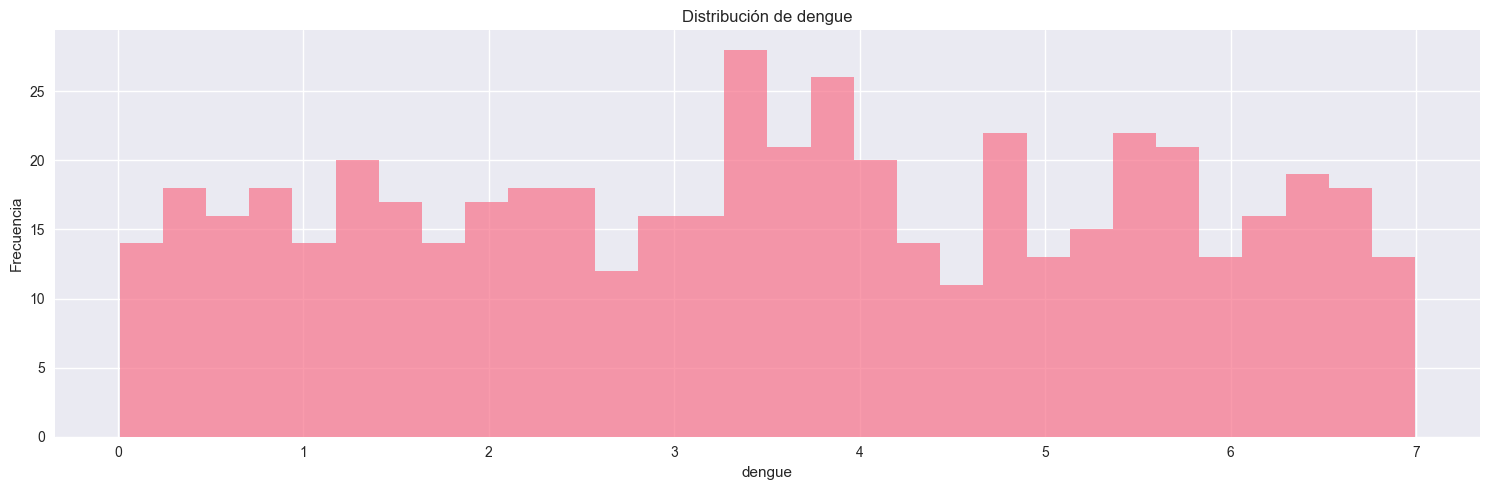

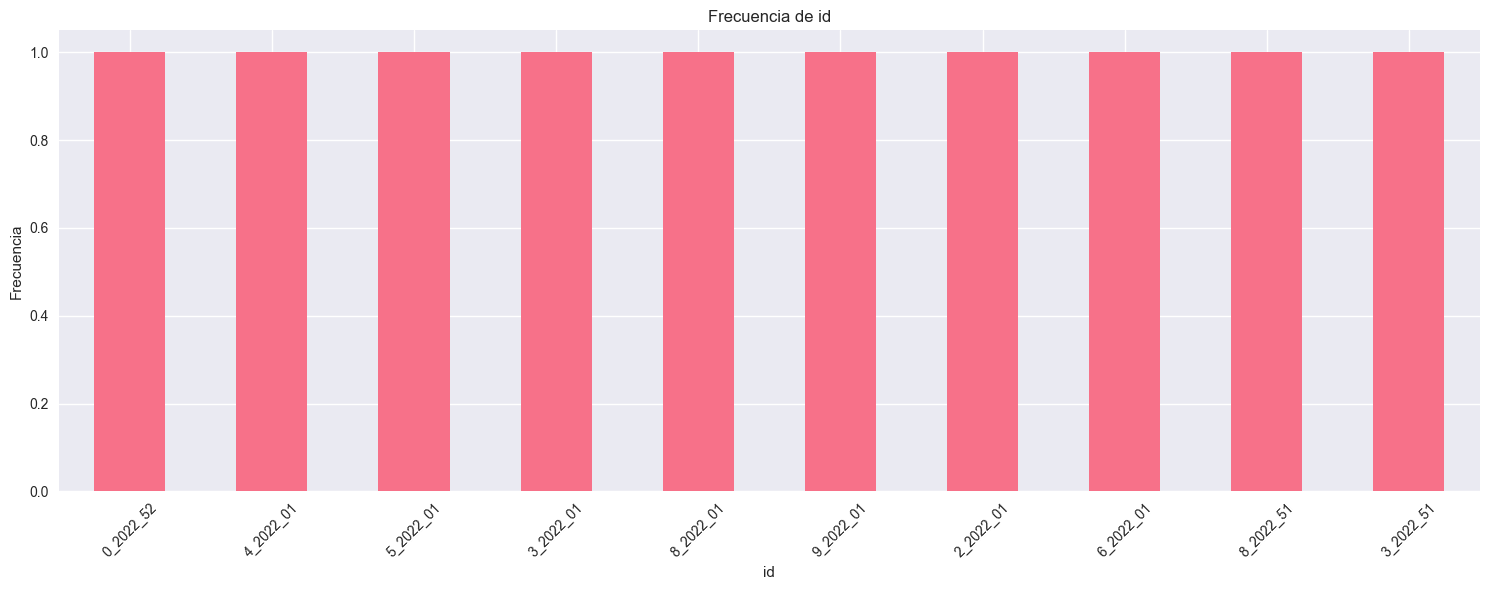


=============== VISUALIZACIONES: DF_TEST ===============


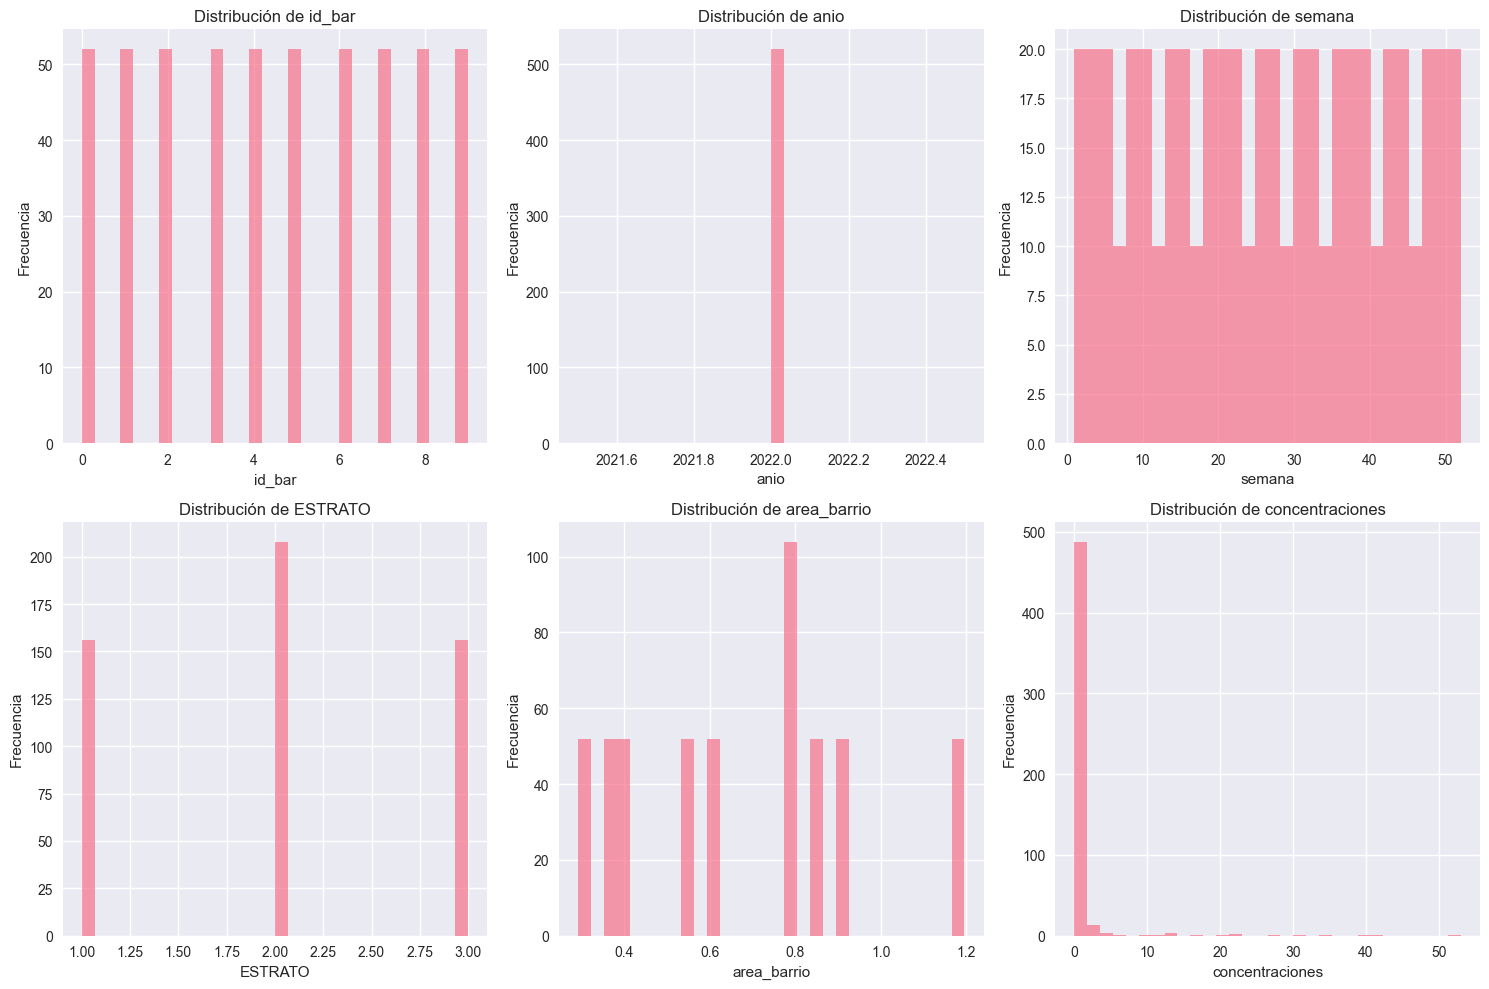

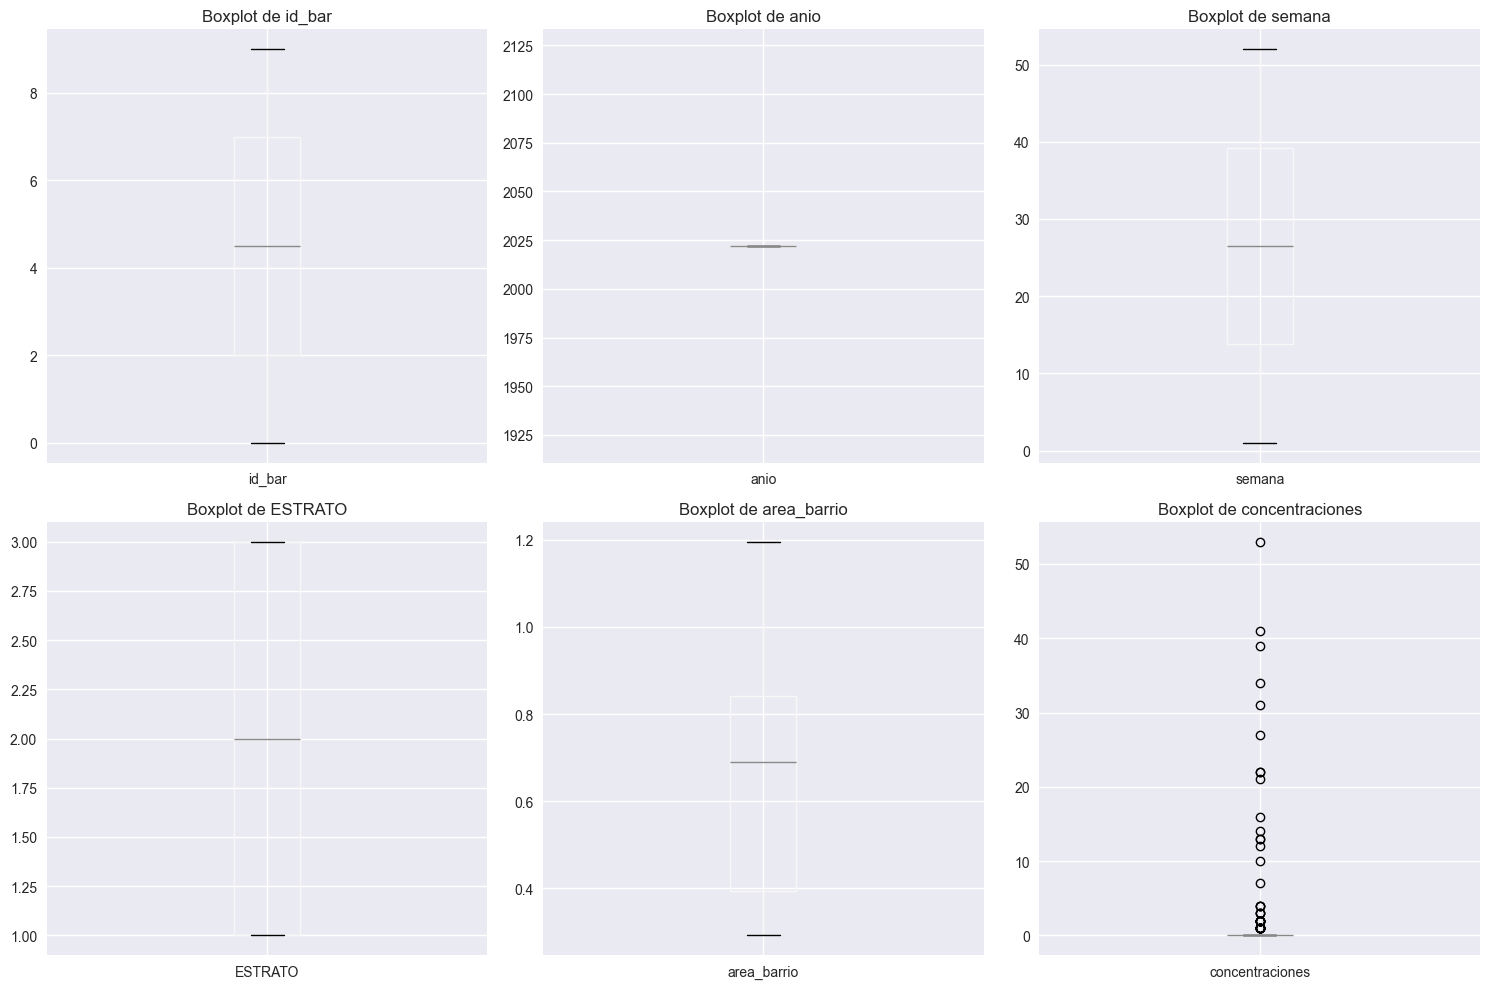

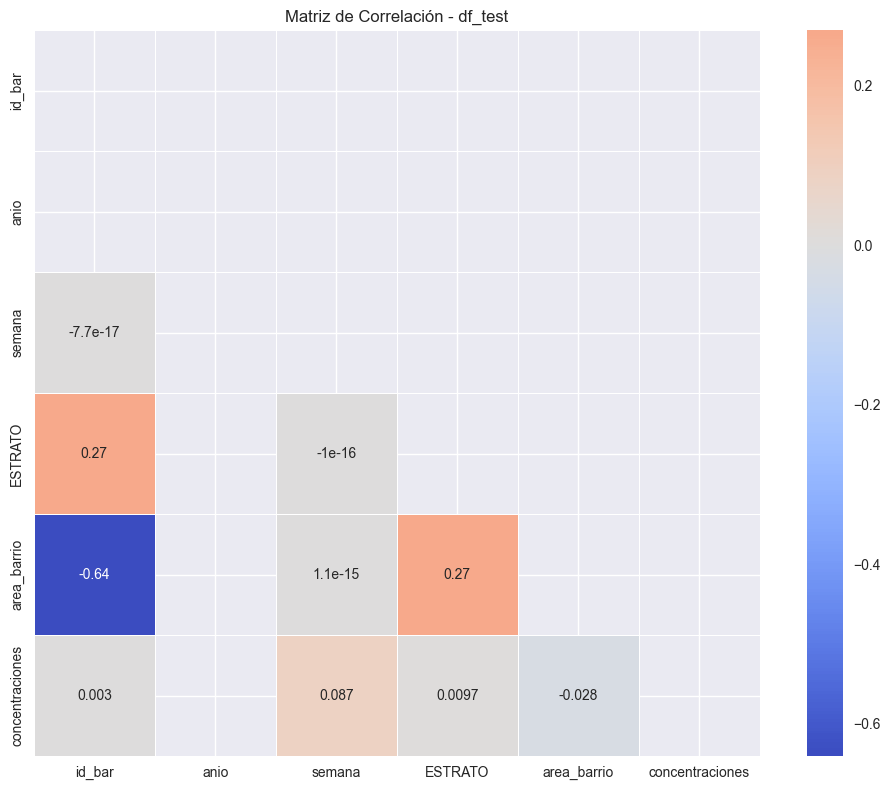

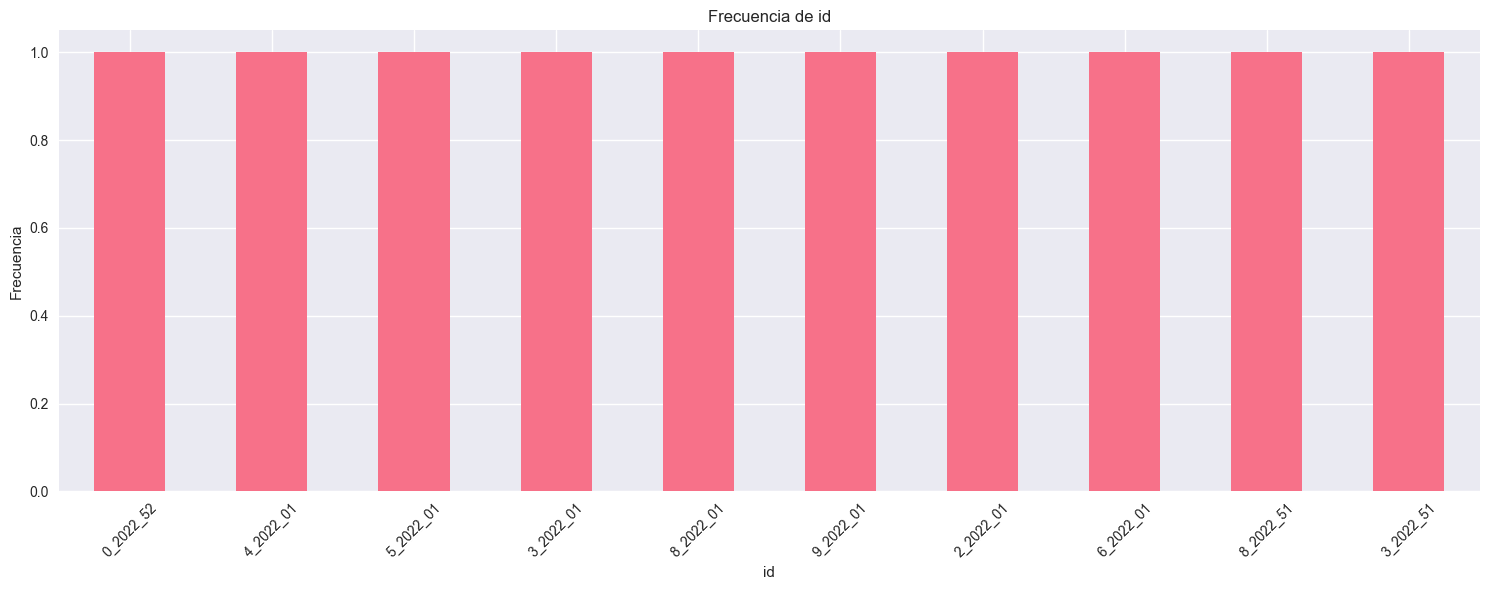


=============== VISUALIZACIONES: DF_TRAIN ===============


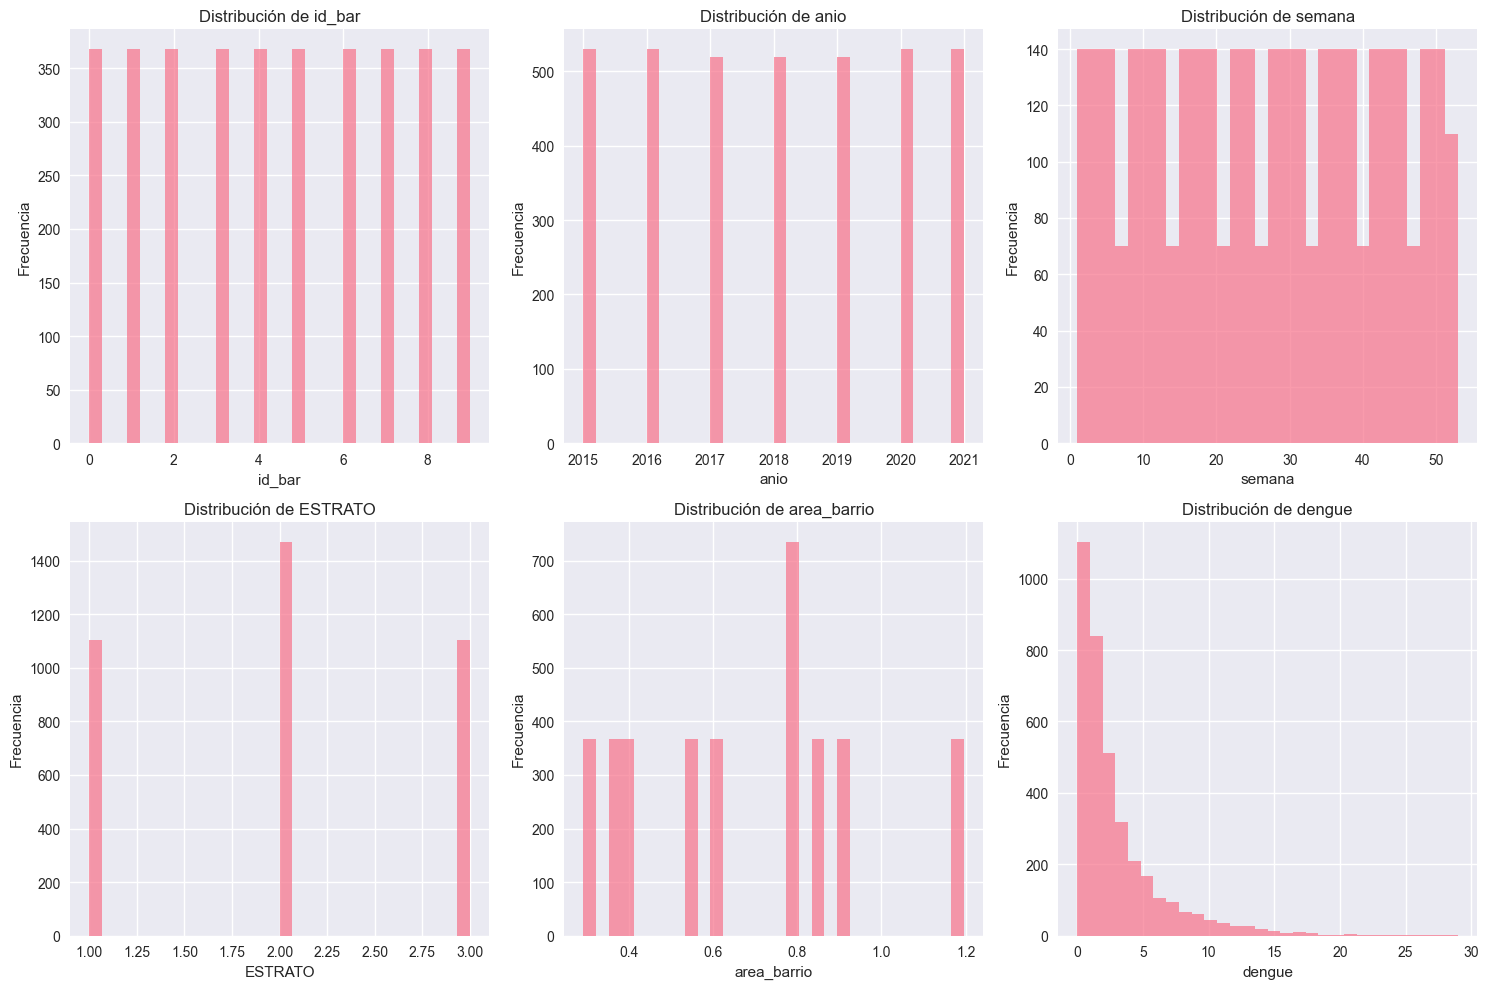

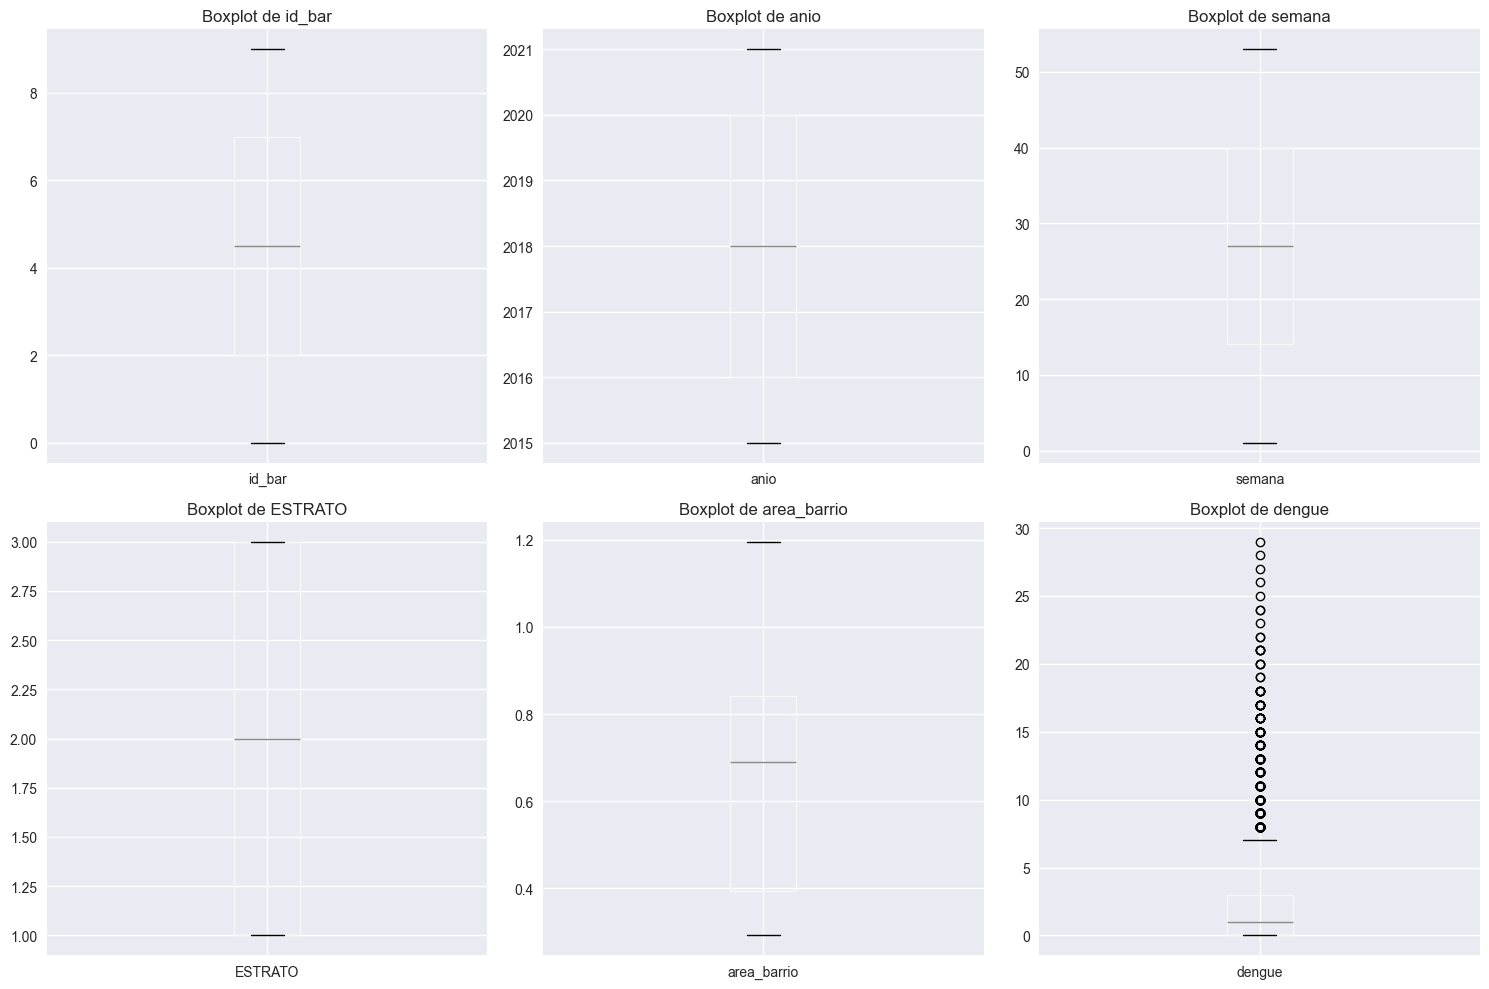

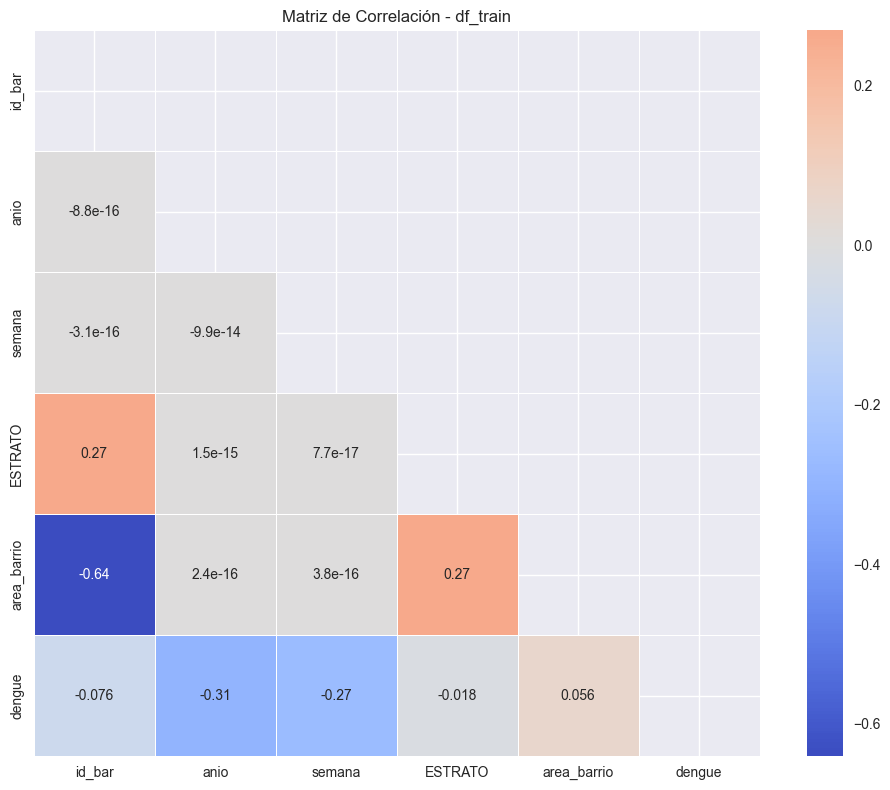

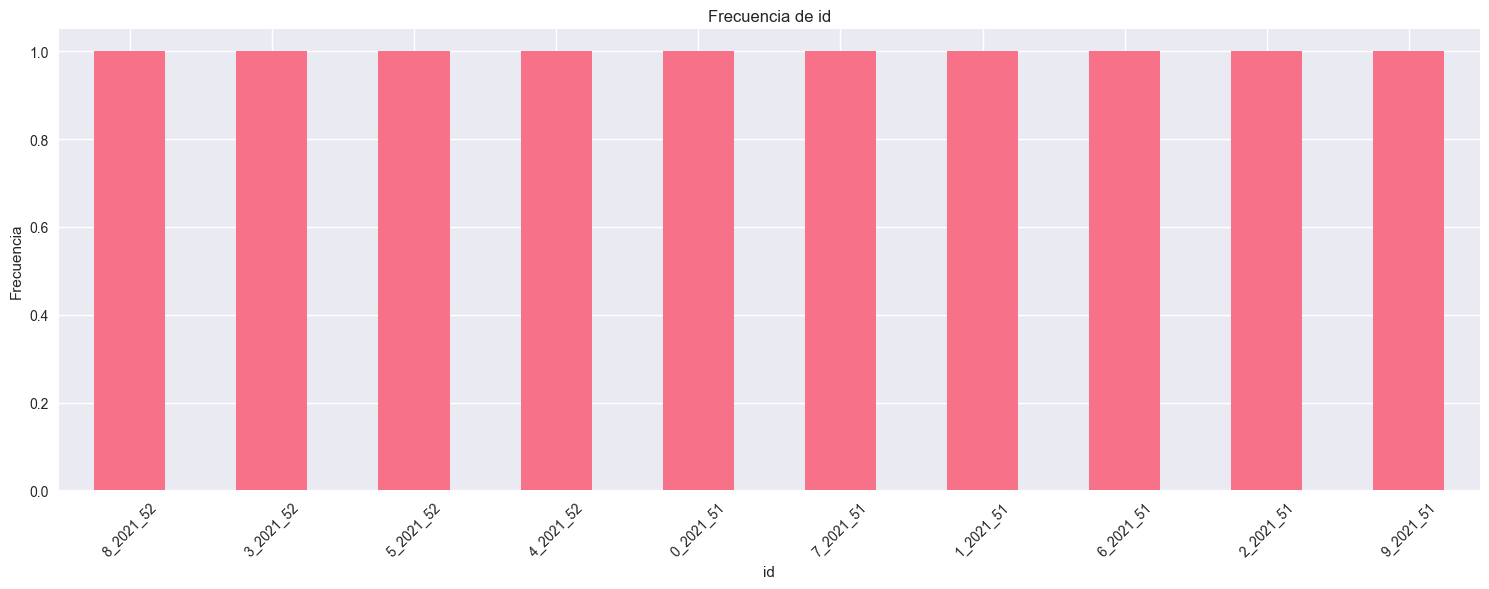


✅ ANÁLISIS COMPLETADO


In [5]:
# 3. Análisis completo de todos los archivos
eda.generar_reporte_completo()

🚀 INICIANDO ANÁLISIS EXPLORATORIO DE DATOS

==================== RESUMEN: DF_TRAIN ====================
📏 Dimensiones: 3680 filas × 20 columnas
💾 Memoria utilizada: 0.75 MB

📋 Tipos de datos:
   float64: 16 columnas
   int64: 2 columnas
   object: 1 columnas
   UInt32: 1 columnas

✅ Sin valores faltantes

🔄 Filas duplicadas: 0 (0.0%)

📊 Primeras 5 filas:
          id  id_bar  anio  semana  ESTRATO  area_barrio  dengue  \
0  4_2015_01       4  2015       1      3.0        0.560     0.0   
1  5_2015_01       5  2015       1      3.0        0.842     0.0   
2  3_2015_01       3  2015       1      1.0        0.781     0.0   
3  8_2015_01       8  2015       1      2.0        0.394     0.0   
4  9_2015_01       9  2015       1      2.0        0.292     0.0   

   concentraciones  vivienda  equipesado  sumideros  maquina  lluvia_mean  \
0              0.0       0.0         0.0        0.0      0.0     0.000651   
1              0.0       0.0         0.0        0.0      0.0     0.000651   
2  

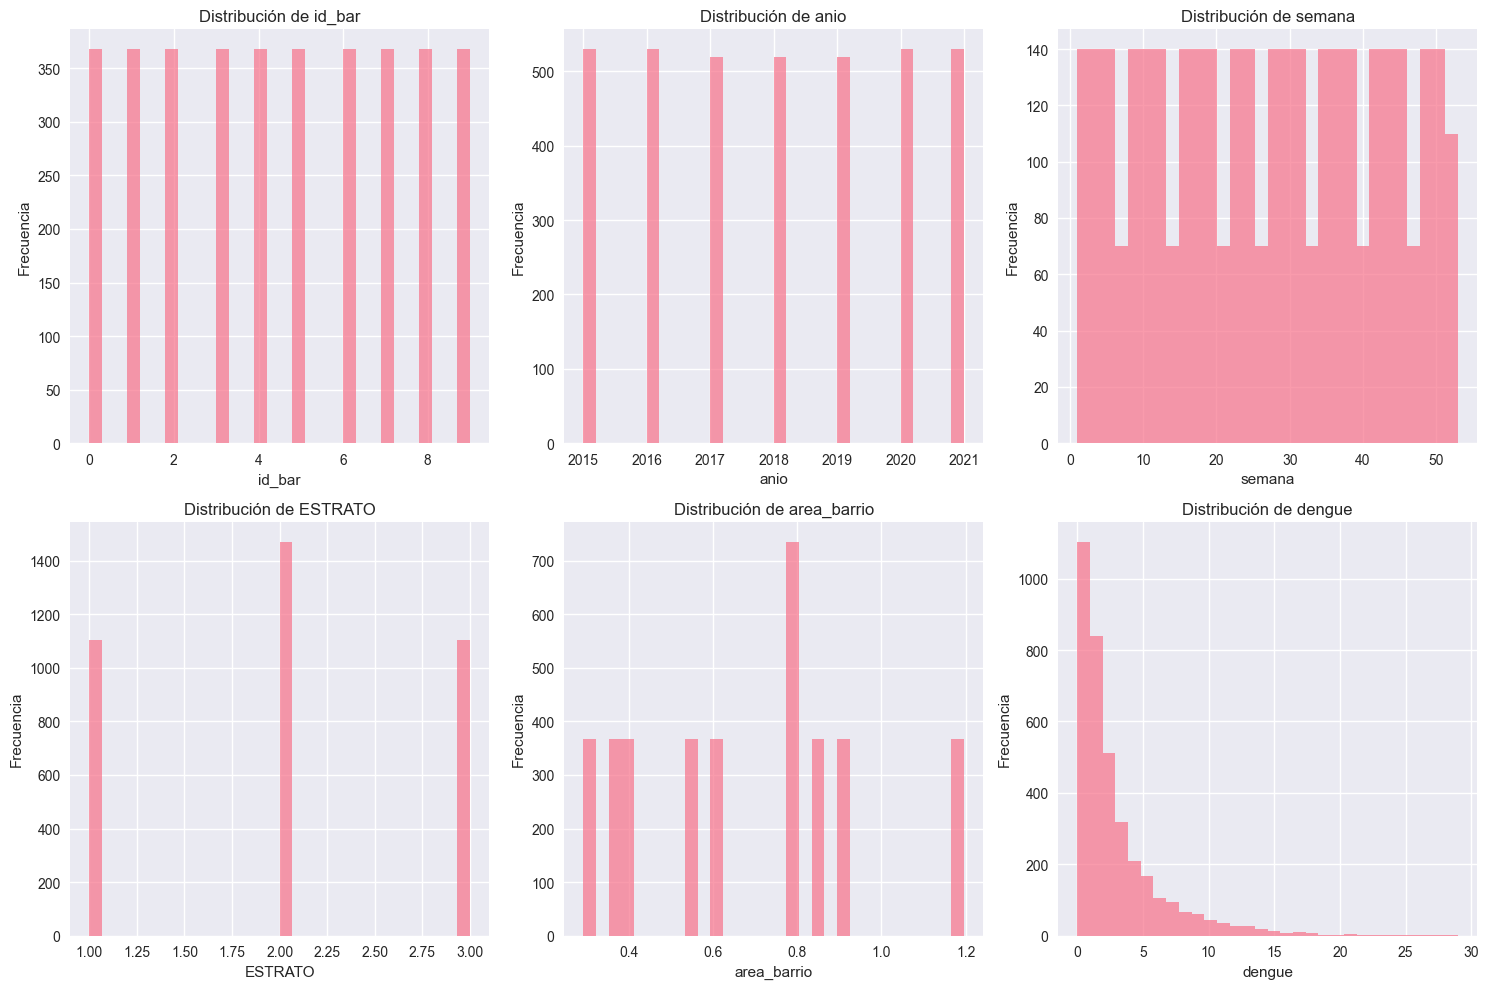

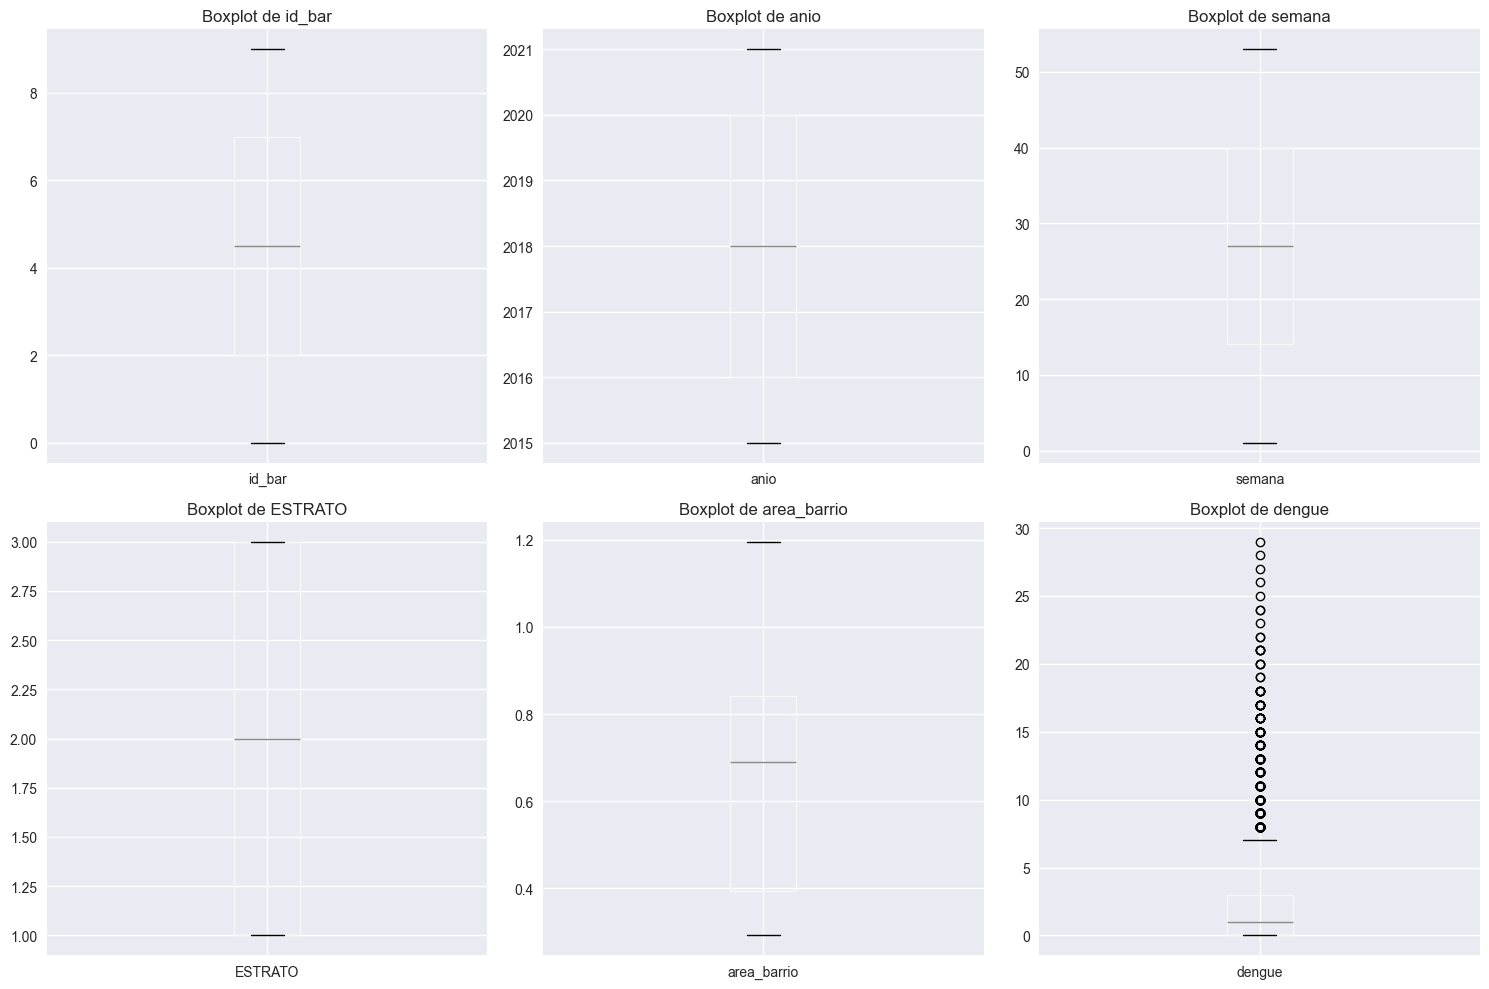

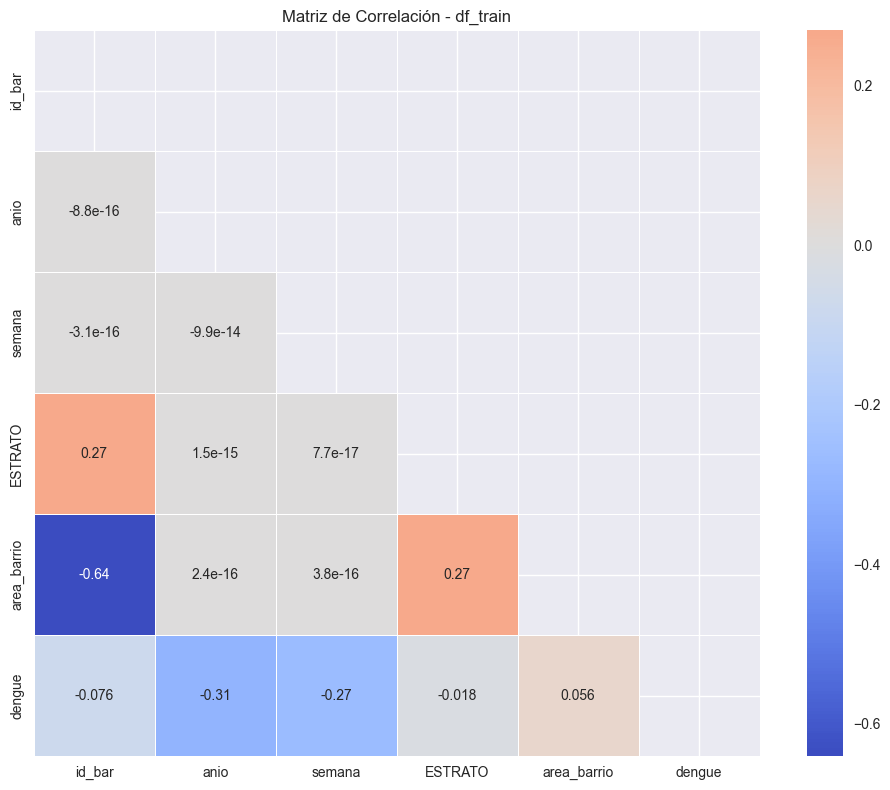

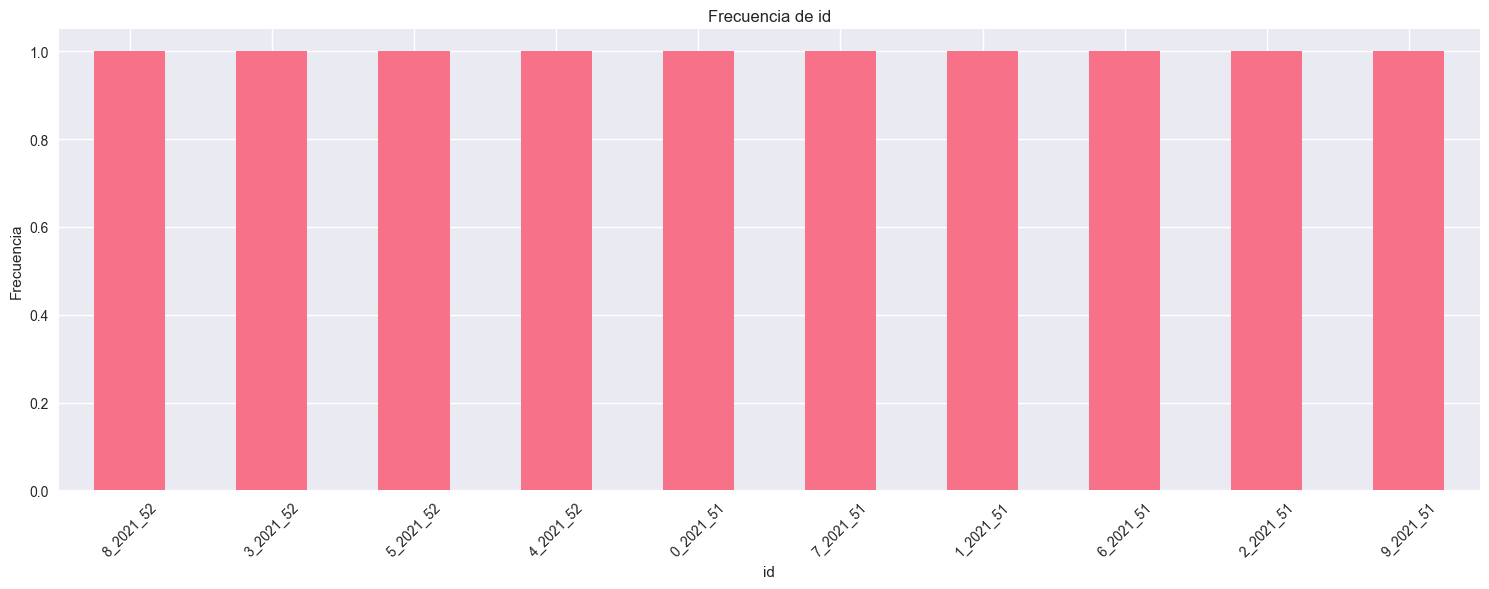


✅ ANÁLISIS COMPLETADO


In [7]:
# 4. O análisis de un archivo específico
eda.generar_reporte_completo("df_train")

In [ ]:




# 5. Acceder a dataframes individuales
# for nombre, df in eda.dataframes.items():
#     print(f"Trabajando con {nombre}: {df.shape}")

# INSTRUCCIONES DE USO:
"""
1. Cambia la variable 'ruta_datos' por la ruta a tu carpeta
2. Ejecuta el código
3. El script automáticamente:
   - Encontrará todos los archivos CSV, Excel, JSON y Parquet
   - Cargará los datos
   - Generará análisis estadístico completo
   - Creará visualizaciones automáticas
   - Mostrará resumen de calidad de datos

ARCHIVOS SOPORTADOS:
- CSV (.csv)
- Excel (.xlsx, .xls)
- JSON (.json)
- Parquet (.parquet)

ANÁLISIS INCLUIDOS:
- Información general del dataset
- Estadísticas descriptivas
- Detección de valores faltantes
- Detección de outliers
- Distribuciones de variables
- Matriz de correlación
- Análisis de variables categóricas
"""

